In [3]:
#Use Logistic regression when the Dependent variable itself is categorical variable
#G Statistics(LOG R)(chi-square test)= F Statistics(Lin R) (Overall model significance)
#Z Statistics(LOG R)= T Statistics(Lin R) (individual independent variable significance)
#Z test and Wald test both are same.
# odd= prob of getting success/prob of not getting success(p/1-p)
# odds_ratio= odds1/odds0
#performance of Log R model= COnfusion marix and ROC

Importing necessary files

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [5]:
#reading the csv file
datas=pd.read_excel("D:/Spyder/Data-Envelopment-Analysis-Excel/Simmons.xls")

In [6]:
datas.head()

,Customer,Spending,Card,Coupon
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0


In [7]:
datas.describe() #it is used to get some statistics

,Customer,Spending,Card,Coupon
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,3.333790,0.500000,0.400000
std,29.011492,1.741298,0.502519,0.492366
min,1.000000,1.058000,0.000000,0.000000
25%,25.750000,2.059000,0.000000,0.000000
50%,50.500000,2.805500,0.500000,0.000000
75%,75.250000,4.468250,1.000000,1.000000
max,100.000000,7.076000,1.000000,1.000000


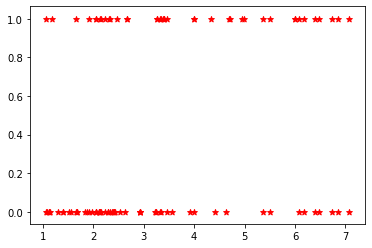

In [8]:
plt.scatter(datas["Spending"], datas["Coupon"], marker="*", color="red")

In [10]:
print(datas["Coupon"].unique()) #Tells the different types of unique values in the column
datas["Coupon"].value_counts() #tells the summation of each unique value

[0 1]


0    60
1    40
Name: Coupon, dtype: int64

Making the logistic regression model

In [11]:
x=datas[["Card","Spending"]] #Since Coupon depends both on card and spending limit
y=datas["Coupon"]

x1=sm.add_constant(x)
logit=sm.Logit(y,x1)
result=logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.604869
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Coupon   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Mon, 06 Apr 2020   Pseudo R-squ.:                  0.1012
Time:                        23:36:33   Log-Likelihood:                -60.487
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                  0.001098
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1464      0.577     -3.718      0.000      -3.278      -1.015
Card           1.0987      0.445      2.471      0.013       0.227       1.970
Spending       0.3416      0.129      2.655      0.008       0.089       0.594
==============================================================================
"""

In [12]:
import scipy
from scipy.stats import chi2

In [15]:
chi2.pdf(13.628,2)

0.000549145469075383

In [16]:
# for confusion matrix and stuff... we need to split the data set in train and test so as to see the accuracy and more

In [17]:
#Splitig dataset into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [22]:
x1=datas[["Card","Spending"]]
y1=datas["Coupon"].values.reshape(-1,1)
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25, random_state=42) 

In [23]:
len(x_train), len(y_train), len(x_test), len(y_test)

(75, 75, 25, 25)

Building The Model and predicting values

In [24]:
Lreg=LogisticRegression(solver="lbfgs")
Lreg.fit(x_train, y_train.ravel()) #ravel() will return 1D array with all the input-array elements

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_predict=Lreg.predict(x_test)
y_predict

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0], dtype=int64)

In [26]:
y_predict_train=Lreg.predict(x_train)
y_predict_train

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

Calculate probability of predicting data values

In [27]:
y_prob_train=Lreg.predict_proba(x_train)[:,1]
y_prob_train.reshape(1,-1)

array([[0.49622117, 0.32880793, 0.44329114, 0.33320924, 0.41456465,
        0.32890329, 0.3975043 , 0.66921229, 0.25844531, 0.63672372,
        0.29274386, 0.28466974, 0.5159296 , 0.41992276, 0.24342356,
        0.528514  , 0.47965107, 0.52805789, 0.33191449, 0.27457435,
        0.49179296, 0.63261616, 0.24690181, 0.47089452, 0.27842076,
        0.41663875, 0.36155602, 0.49970327, 0.23621636, 0.37860052,
        0.48809323, 0.28877877, 0.28563859, 0.37231882, 0.65309742,
        0.43807264, 0.33638478, 0.40406607, 0.23431177, 0.37282384,
        0.49970327, 0.39768396, 0.32880793, 0.25782472, 0.47393834,
        0.42878861, 0.26520939, 0.33320924, 0.54682499, 0.45446086,
        0.44326597, 0.4965167 , 0.60065954, 0.38989654, 0.49149447,
        0.27414424, 0.27785686, 0.67464141, 0.28195004, 0.48593427,
        0.38633222, 0.31373499, 0.42810085, 0.27418723, 0.44371771,
        0.41629601, 0.642004  , 0.6571001 , 0.44068025, 0.28195004,
        0.40217015, 0.43807264, 0.50977653, 0.57

In [28]:
y_prob= Lreg.predict_proba(x_test)[:,1]
y_prob.reshape(1,-1)

array([[0.52802946, 0.49516653, 0.45703306, 0.27712052, 0.34390047,
        0.26825171, 0.27712052, 0.607686  , 0.42836534, 0.43637155,
        0.31387455, 0.23676248, 0.45703306, 0.43602768, 0.37596116,
        0.44900317, 0.46952365, 0.68521935, 0.25167254, 0.47073304,
        0.42361093, 0.56580644, 0.52792177, 0.40302605, 0.27457435]])

In [29]:
# Summary for logistic model again.... copying from above
x=datas[["Card","Spending"]] #Since Coupon depends both on card and spending limit
y=datas["Coupon"]

x1=sm.add_constant(x)
logit=sm.Logit(y,x1)
result=logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.604869
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Coupon   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Mon, 06 Apr 2020   Pseudo R-squ.:                  0.1012
Time:                        23:48:49   Log-Likelihood:                -60.487
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                  0.001098
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1464      0.577     -3.718      0.000      -3.278      -1.015
Card           1.0987      0.445      2.471      0.013       0.227       1.970
Spending       0.3416      0.129      2.655      0.008       0.089       0.594
==============================================================================
"""

In [30]:
#Calculating Accuracy Score using Confusion Matrix
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test, y_predict)
score

0.76

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict) #output: array([[TN,FP],
                                    #               [FN,TP]])

array([[15,  1],
       [ 5,  4]], dtype=int64)

In [33]:
tn,fp,fn,tp=confusion_matrix(y_test,y_predict).ravel()
print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)
print("True Positives: ", tp)

True Negatives:  15
False Positives:  1
False Negatives:  5
True Positives:  4


In [35]:
#Generating Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.80      0.44      0.57         9

    accuracy                           0.76        25
   macro avg       0.78      0.69      0.70        25
weighted avg       0.77      0.76      0.74        25

